### Decision Tree Classifier

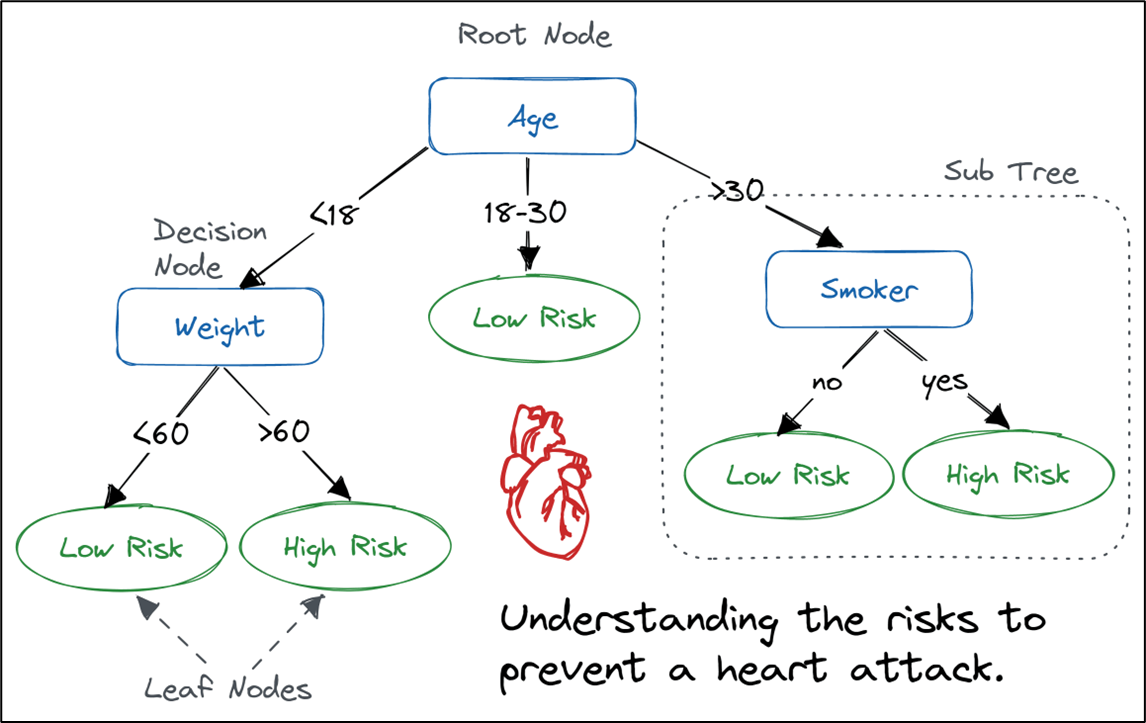

In [25]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [26]:
import pandas as pd
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


##### Target feature us Drug
### Step 2 - Perform basic data quality checks

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [28]:
df.shape

(200, 6)

In [29]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Separate X and Y

In [31]:
X = df.drop(columns=["Drug"])
Y = df[["Drug"]]

In [32]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [33]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [34]:
Y.value_counts()

Drug 
DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

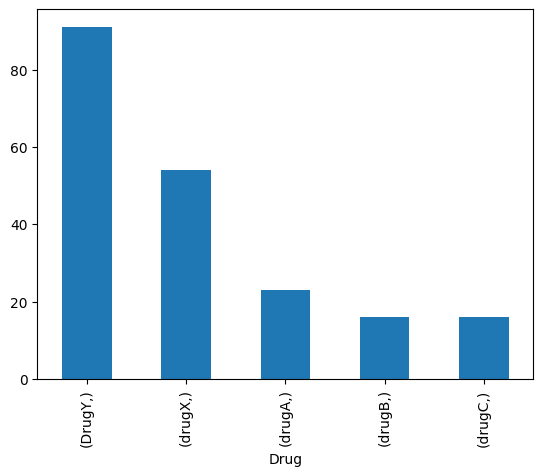

In [35]:
Y.value_counts().plot(kind="bar")

#### Clearly, from the plot, Drug Y is prescribed more

### Step 4 - Apply Preprocessing on X

In [36]:
X.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [37]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [38]:
cat

['Sex', 'BP', 'Cholesterol']

In [39]:
con

['Age', 'Na_to_K']

#### Step 4.1: Actual preprocessing begins here

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [41]:
num_pipe = make_pipeline(
   SimpleImputer(strategy="median"),
   StandardScaler()
)

In [42]:
cat_pipe = make_pipeline(
   SimpleImputer(strategy="most_frequent"),
   OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [43]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [44]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Divide data in train test split

In [45]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.4, random_state=42)

In [46]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
77,-1.109805,0.426945,1.0,0.0,1.0,0.0,0.0,0.0,1.0
46,-0.443255,-0.415423,1.0,0.0,1.0,0.0,0.0,1.0,0.0
187,0.162699,-0.788452,0.0,1.0,1.0,0.0,0.0,1.0,0.0
191,-1.291591,-1.120403,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [47]:
ytrain.head()

,Drug
2,drugC
77,DrugY
46,drugA
187,drugA
191,drugA


In [48]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
95,-0.503851,-0.646762,0.0,1.0,0.0,1.0,0.0,0.0,1.0
15,-1.715759,-0.078892,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,-1.594568,-1.017848,1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,0.889843,-0.782762,1.0,0.0,0.0,1.0,0.0,1.0,0.0
128,0.162699,2.422679,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [49]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [50]:
xtrain.shape

(120, 9)

In [51]:
xtest.shape

(80, 9)

### Step 6: Buil the decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
model = DecisionTreeClassifier(
   max_depth=1,
   min_samples_split=5,
   min_samples_leaf=5,
   criterion="entropy"
)

In [54]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5)

In [55]:
model.score(xtrain, ytrain)

0.725

In [56]:
model.score(xtest, ytest)

0.725

### Hyperparameter tuning

In [57]:
params = {
   "max_depth":[2,3,4,5,6],
   "min_samples_split":[5,6,7,8,9],
   "min_samples_leaf":[5,6,7,8,9],
   "criterion":["gini", "entropy"]
}

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
base_model = DecisionTreeClassifier()
gscv = GridSearchCV(base_model, param_grid=params, cv=5, scoring="f1_macro")
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [60]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [61]:
gscv.best_score_

np.float64(0.980952380952381)

In [62]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5)